In [52]:
import numpy as np
import matplotlib.pyplot as plt

import mne
import pickle

# Channel list

In [6]:
ch_names = np.loadtxt('channel_list.txt', dtype=str)

In [7]:
ch_names

array(['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7',
       'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'FC1', 'FC2',
       'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'FT9', 'FT10', 'TP9',
       'TP10', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2', 'AF3', 'AF4', 'FC3',
       'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5',
       'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8',
       'Fpz', 'CPz', 'POz', 'Oz', 'FCz'], dtype='<U4')

# Channel position (10-20 system)

In [ ]:
# Load info
with open('info.pkl', 'rb') as inp:
    info = pickle.load(inp)

In [55]:
info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 64 items (64 EEG)
 highpass: 0.0 Hz
 lowpass: 62.5 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 125.0 Hz
>

In [120]:
# Form the 10-20 montage
mont1020 = mne.channels.make_standard_montage('standard_1020')
# Choose what channels you want to keep 
# Make sure that these channels exist e.g. T1 does not exist in the standard 10-20 EEG system!
ind = [i for (i, channel) in enumerate(mont1020.ch_names) if channel in ch_names]
mont1020_new = mont1020.copy()
# Keep only the desired channels
mont1020_new.ch_names = [mont1020.ch_names[x] for x in ind]
kept_channel_info = [mont1020.dig[x+3] for x in ind]
# Keep the first three rows as they are the fiducial points information
mont1020_new.dig = mont1020.dig[0:3]+kept_channel_info

Creating RawArray with float64 data, n_channels=64, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


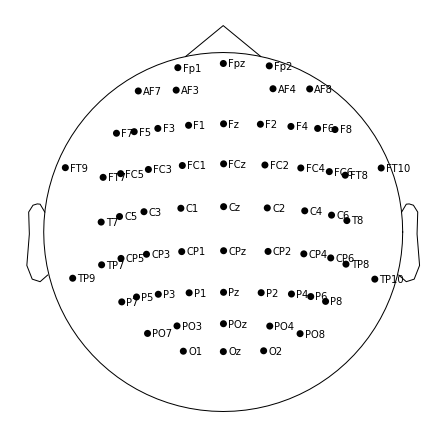

In [121]:
mont1020_new.plot()
plt.show()

# Plot topomap

#### !!! siccome non abbiamo ancora i microstati, intanto come esempio ho plottato dei dati random che mi sono generato

In [69]:
# Generate fake data
rng = np.random.RandomState(0)
data = rng.normal(size=(len(ch_names), 1)) * 1e-6

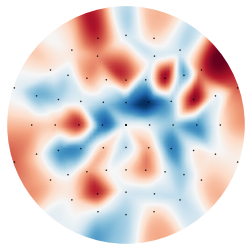

In [72]:
# Plot topomap
mne.viz.plot_topomap(data[:,0], info, contours=0)
plt.show()